In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Image librarie
from PIL import Image

# Filesystem
import json

# Other
import random
import os

print(tf.__version__)

env = open('env.json','r')
env = json.load(env)

1.13.1


### Load all images

In [3]:
img_directory = env['dataset_path'] if env['dataset_path'] else "../dataset/"

def list_files_from_directory(directory = "./", extension = "jpg"):
    return list(f for f in os.listdir(directory) if f.endswith('.' + extension))

def load_images(nb_images = -1, vue_of_image = "SEC", img_directory = "./"):
    #On recupere la liste des chemins vers les images du dataset originale
    img_list = list_files_from_directory(directory = img_directory)
    random.shuffle(img_list)
    
    nb_original_img = len(img_list)
    if nb_images == -1:
        nb_images = nb_original_img
    
    #On itere sur toutes les images pour les chargers dans le dataset
    train_dataset = []
    train_labels = []
    test_dataset = []
    test_labels = []
    
    i = 0
    nb_ACI = 0
    nb_WED = 0
    nb_WHE = 0
    nb_autre = 0
    
    for img_path in img_list:
        test_or_train = random.random()
        add_image = False
        type_img = img_path.split("_")[0]
        vue = img_path.split("_")[1]
        if vue == vue_of_image:
            if type_img == "IIIb":
                label = 0
                add_image = True
                nb_ACI += 1
            elif type_img == "IIb":
                label = 1
                add_image = True 
                nb_WED += 1
            elif type_img == "Ia":
                label = 2
                add_image = True
                nb_WHE += 1
            else:
                label = 3
                add_image = True
                nb_autre += 1
        if add_image:
            i += 1
            img = np.array(Image.open(img_directory + img_path).resize((500, 500)))
            if test_or_train <= 0.6:
                train_dataset.append(img)
                train_labels.append(label)
            else:
                test_dataset.append(img)
                test_labels.append(label)
        if i >= nb_images:
            break
        
    print("IIIb : " + str(nb_ACI) + " IIb : " + str(nb_WED) + " Ia : " + str(nb_WHE) + " Autre : " + str(nb_autre))
    return np.array(train_dataset), np.array(train_labels), np.array(test_dataset), np.array(test_labels)

type_of_vue = "SUR"
(train_images, train_labels, test_images, test_labels) = load_images(-1, img_directory = img_directory, vue_of_image = type_of_vue)

IIIb : 17 IIb : 22 Ia : 29 Autre : 0


In [4]:
class_names = ['IIIb', 'IIb', 'Ia', 'Autre']
train_images.shape

(38, 500, 500, 3)

In [5]:
len(train_labels)

38

In [6]:
train_labels

array([2, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0])

In [7]:
test_images.shape

(30, 500, 500, 3)

In [8]:
len(test_labels)

30

### Preprocess

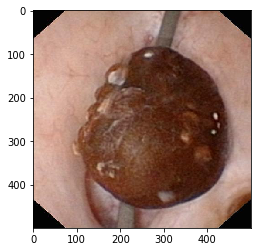

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)

In [10]:
for img in train_images:
    for px in img:
        px = px / 255.0

for img in test_images:
    for px in img:
        px = px / 255.0

print("Training set :", train_images.shape)
print("Test set :", test_images.shape)

Training set : (38, 500, 500, 3)
Test set : (30, 500, 500, 3)


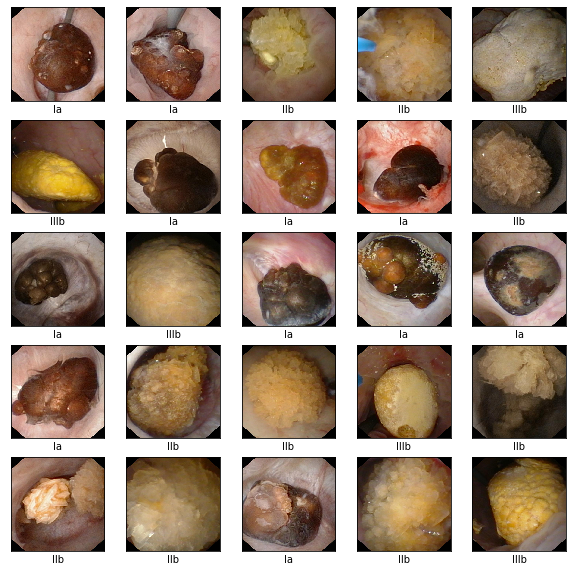

In [11]:
plt.figure(figsize=(10,10))
for i in range(min(25, len(train_images))):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

In [12]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

model = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
